In [0]:
import numpy as np
from keras.datasets import imdb
np_load_old = np.load
np.load = lambda*a , **k : np_load_old(*a , allow_pickle = True , **k)
(train_data , train_labels), (test_data , test_labels) = imdb.load_data(num_words= 10000)
np.load = np_load_old

Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step


In [0]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [0]:
test_data[1]

[1,
 14,
 22,
 3443,
 6,
 176,
 7,
 5063,
 88,
 12,
 2679,
 23,
 1310,
 5,
 109,
 943,
 4,
 114,
 9,
 55,
 606,
 5,
 111,
 7,
 4,
 139,
 193,
 273,
 23,
 4,
 172,
 270,
 11,
 7216,
 2,
 4,
 8463,
 2801,
 109,
 1603,
 21,
 4,
 22,
 3861,
 8,
 6,
 1193,
 1330,
 10,
 10,
 4,
 105,
 987,
 35,
 841,
 2,
 19,
 861,
 1074,
 5,
 1987,
 2,
 45,
 55,
 221,
 15,
 670,
 5304,
 526,
 14,
 1069,
 4,
 405,
 5,
 2438,
 7,
 27,
 85,
 108,
 131,
 4,
 5045,
 5304,
 3884,
 405,
 9,
 3523,
 133,
 5,
 50,
 13,
 104,
 51,
 66,
 166,
 14,
 22,
 157,
 9,
 4,
 530,
 239,
 34,
 8463,
 2801,
 45,
 407,
 31,
 7,
 41,
 3778,
 105,
 21,
 59,
 299,
 12,
 38,
 950,
 5,
 4521,
 15,
 45,
 629,
 488,
 2733,
 127,
 6,
 52,
 292,
 17,
 4,
 6936,
 185,
 132,
 1988,
 5304,
 1799,
 488,
 2693,
 47,
 6,
 392,
 173,
 4,
 2,
 4378,
 270,
 2352,
 4,
 1500,
 7,
 4,
 65,
 55,
 73,
 11,
 346,
 14,
 20,
 9,
 6,
 976,
 2078,
 7,
 5293,
 861,
 2,
 5,
 4182,
 30,
 3127,
 2,
 56,
 4,
 841,
 5,
 990,
 692,
 8,
 4,
 1669,
 398,
 229,
 10,


In [0]:
train_labels[1]

0

In [0]:
test_labels[1]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
min([min(sequence) for sequence in train_data])

1

In [0]:
min([min(sequence) for sequence in test_data])

1

In [0]:
max([max(sequence) for sequence in test_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = "".join([reverse_word_index.get(i-3 , '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences , dimension = 10000):
  results = np.zeros((len(sequences) , dimension))
  for i, sequence in enumerate(sequences):
    results[i , sequence]=1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh' , input_shape=(10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
#compile 
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001) , loss = 'binary_crossentropy' , metrics =['acc'])

In [0]:
from keras import losses 
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001) , loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])

In [0]:
#Validating 
x_val = x_train[:10000]
partial_x_train= x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
#history #Training you model

history = model.fit(partial_x_train , partial_y_train ,epochs=10 , batch_size=1024 ,validation_data(x_val , y_val))

SyntaxError: ignored

In [0]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs= 15,
                   batch_size = 512,
                   validation_data = (x_val , y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 3s 226us/step - loss: 0.0174 - binary_accuracy: 0.9977 - val_loss: 0.5677 - val_binary_accuracy: 0.8668
Epoch 2/15
15000/15000 [==============================] - 2s 157us/step - loss: 0.0135 - binary_accuracy: 0.9978 - val_loss: 0.6095 - val_binary_accuracy: 0.8650
Epoch 3/15
15000/15000 [==============================] - 2s 155us/step - loss: 0.0082 - binary_accuracy: 0.9995 - val_loss: 0.6390 - val_binary_accuracy: 0.8635
Epoch 4/15
15000/15000 [==============================] - 2s 155us/step - loss: 0.0101 - binary_accuracy: 0.9984 - val_loss: 0.6688 - val_binary_accuracy: 0.8647
Epoch 5/15
15000/15000 [==============================] - 2s 154us/step - loss: 0.0082 - binary_accuracy: 0.9986 - val_loss: 0.7013 - val_binary_accuracy: 0.8638
Epoch 6/15
15000/15000 [==============================] - 2s 157us/step - loss: 0.0036 - binary_accuracy: 0.9999 - val_loss: 0.7288 - val_bi

In [0]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [0]:
import matplotlib.pyplot as plt

history_dict= history.history
loss_values = history_dict['val_loss']
val_loss_values = history_dict['loss']

#epochs = range(1, len(val_binary_accuracy) +1)

#plt.plot(epochs , loss_values, 'bo' , label='Training loss')
#plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
#plt.title('Training and Validation loss')
#plt.xlabel('Epoch')
#plt.ylabel('loss')
#plt.legend()

#plt.show()

In [0]:
epochs = range(1, len(loss_values) +1)

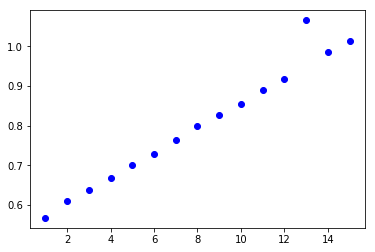

In [0]:
plt.plot(epochs, loss_values , 'bo' , label='Training loss')

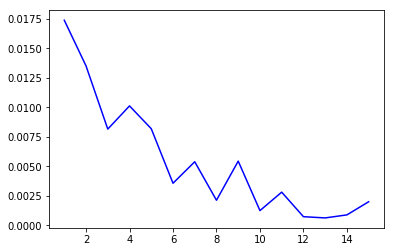

In [0]:
plt.plot(epochs , val_loss_values , 'b' , label='Validation loss')

W0727 19:33:27.366546 139843409844096 legend.py:1289] No handles with labels found to put in legend.


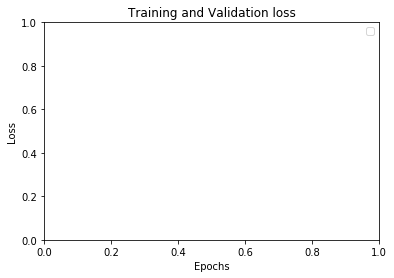

In [0]:
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

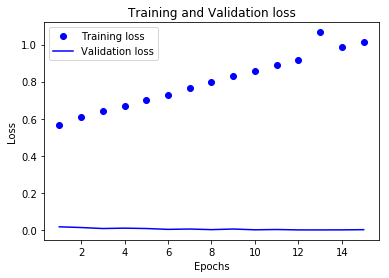

In [0]:
import matplotlib.pyplot as plt

history_dict= history.history
loss_values = history_dict['val_loss']
val_loss_values = history_dict['loss']

epochs = range(1, len(loss_values) +1)
plt.plot(epochs, loss_values , 'bo' , label='Training loss')
plt.plot(epochs , val_loss_values , 'b' , label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']


KeyError: ignored

<Figure size 432x288 with 0 Axes>